# Wrangle And Analyze Data.

> ## By Ashwani Singh

# WeRateDogs.

# Introduction
 
-  The purpose of this project is to apply what I have Learned in Data Wrangling section from Udacity Data Analysis Nano Degree Program. 

> - The dataset that  will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

# Gathering Data -

- The WeRateDogs Twitter archive( twitter_archive_enhanced.csv) has provided.
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers.
-  URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data.


In [2]:
# import the libraries

import numpy as np
import pandas as pd
import requests
import os
import time
import matplotlib.pyplot as plt
import tweepy
import json
import seaborn as sns
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [3]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# request for image

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_requests = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_requests.content)

images = pd.read_csv('image_predictions.tsv', sep = '\t')


In [6]:
# Twiter Api

consumer_key = "XXXX"
consumer_secret = "XXXX"
access_token = "XXXX-XXXX"
access_secret = "XXXX"

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# this starts the timer
start = time.time()

tweet_ids = twitter_archive.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

# this stops the timer            
end = time.time()

print(end - start)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
793271401113350145
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368
704499785726889984
680055455951884288
3231.9880442619324


In [10]:
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [11]:

# Loading the Twitter API data
twitter_counts_df = pd.read_json('tweet_json.txt')
twitter_counts_df['tweet_id'] = tweet_success
twitter_counts_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [12]:
twitter_counts_df.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,36239,7712
1,892177421306343426,31249,5699
2,891815181378084864,23530,3778
3,891689557279858688,39521,7868
4,891327558926688256,37724,8485


# Assesing

## for twitter_archive

In [13]:
#  twitter_archive 

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
# twitter_archive.head()

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# twitter_archive.info()

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# twitter_archive.describe()

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
print("numerator rating value are :",len(twitter_archive.rating_numerator.value_counts()))

numerator rating value are : 40


In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
print("denominator rating are :",len(twitter_archive.rating_denominator.value_counts()))

denominator rating are : 18


In [21]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Pubert        1
Bertson       1
Colin         1
Jessifer      1
Cheryl        1
Name: name, Length: 957, dtype: int64

In [22]:
print("name value are : ",len(twitter_archive.name.value_counts()))

name value are :  957


In [23]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
print("source value are :",len(twitter_archive.source.value_counts()))

source value are : 4


## for images

In [25]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
images.jpg_url.value_counts()

https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg    2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
                                                  ..
https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg    1
https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg    1
https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg    1
https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg    1
https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [27]:
print("images url are : ",len(images.jpg_url.value_counts()))

images url are :  2009


In [28]:
# importing image python

from IPython.display import Image

Image(url= "https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg" )


In [29]:
images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hammer                  1
minibus                 1
clumber                 1
mailbox                 1
cougar                  1
Name: p1, Length: 378, dtype: int64

In [32]:
print("p1 value are :",len(images.p1.value_counts()))

p1 value are : 378


In [33]:
images.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
computer_keyboard       1
triceratops             1
rifle                   1
brown_bear              1
cougar                  1
Name: p2, Length: 405, dtype: int64

In [34]:
print("p2 value are :",len(images.p2.value_counts()))

p2 value are : 405


## for twitter_counts_df

In [35]:
twitter_counts_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36239,7712
1,892177421306343426,31249,5699
2,891815181378084864,23530,3778
3,891689557279858688,39521,7868
4,891327558926688256,37724,8485
...,...,...,...
2324,666049248165822465,96,39
2325,666044226329800704,273,132
2326,666033412701032449,112,41
2327,666029285002620928,121,42


In [36]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36239,7712
1,892177421306343426,31249,5699
2,891815181378084864,23530,3778
3,891689557279858688,39521,7868
4,891327558926688256,37724,8485


In [37]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id          2329 non-null int64
favorite_count    2329 non-null int64
retweet_count     2329 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [38]:
twitter_counts_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419019e+17,7566.601546,2706.563332
std,6.824830e+16,11746.215613,4577.102475
min,6.660209e+17,0.000000,1.000000
25%,6.782555e+17,1316.000000,548.000000
50%,7.182469e+17,3289.000000,1268.000000
75%,7.986731e+17,9261.000000,3150.000000
max,8.924206e+17,156287.000000,77861.000000


### Now make a copy of each dataframe

In [39]:
twitter_archive_copy = twitter_archive.copy()
images_copy = images.copy()
twitter_counts_df_copy = twitter_counts_df.copy()

# cleaning data

<ol>
    <li>Merge the clean version of twitter_archive, images, twitter_counts_df into a DataFrame.</li>
    <li>Create a column for various dog type.</li>
    <li>Delete Retweets.</li>
    <li>Remove the column no longer uses.</li>
    <li>Change tweet_id from integer to a String.</li>
    <li>Change the timestamp to correct datetime format.</li>
    <li>Correct the naming issue.</li>
    <li>Standardize the Dog ratings.</li>
    <li>Create new dog_breed column using the image prediction.</li>
    

### Code And Test : Merge the clean version of twitter_archive, images, twitter_counts_df into a DataFrame.

In [40]:
store = [twitter_archive_copy, images_copy, twitter_counts_df_copy]
tweet_datas = pd.concat(store, sort=False)

In [41]:
tweet_datas.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6760 entries, 0 to 2328
Data columns (total 30 columns):
tweet_id                      6760 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                     

### Code And Test : Create a column for various dog type.

In [43]:
tweet_datas['dog_type'] = tweet_datas['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [44]:
tweet_datas[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
200,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN
1643,pupper,None,None,None,None
717,NaN,None,None,None,None
2320,NaN,None,None,None,None
243,NaN,None,None,None,None
1084,NaN,None,None,None,None
764,NaN,NaN,NaN,NaN,NaN
364,NaN,None,None,None,None
1676,NaN,None,None,None,None


In [45]:
tweet_datas.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
tweet_datas[tweet_datas.tweet_id==855851453814013952]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puppo
1919,855851453814013952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,NaN,NaN,NaN
183,855851453814013952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44443.0,17363.0,NaN


In [47]:
tweet_datas.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

### Code And Test : Delete Retweets.

In [48]:
tweet_datas = tweet_datas[np.isnan(tweet_datas.retweeted_status_id)]

In [49]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 31 columns):
tweet_id                      6579 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       2075

In [50]:
# remove the column retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

tweet_datas = tweet_datas.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [51]:
tweet_datas.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 28 columns):
tweet_id                 6579 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                

### Code And Test : Remove the column no longer uses.

In [53]:
tweet_datas = tweet_datas.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'img_num'], axis=1)

In [54]:
tweet_datas.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 24 columns):
tweet_id              6579 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 no

### Code And Test : Change tweet_id from integer to a String.

In [56]:
#using astype(str)

tweet_datas['tweet_id'] = tweet_datas['tweet_id'].astype(str)

In [57]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 24 columns):
tweet_id              6579 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 n

### Code And Test : Change the timestamp to correct datetime format.

In [58]:
# fisrt remove the timezone from timestamp
tweet_datas['timestamp'] = tweet_datas['timestamp'].str.slice(start =0, stop= -6)

In [59]:
# now convert it into datetime

tweet_datas['timestamp'] =  pd.to_datetime(tweet_datas['timestamp'], format="%Y-%m-%d %H:%M:%S")


In [60]:
tweet_datas.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 24 columns):
tweet_id              6579 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog              

### Code And Test : Correct the naming issue.

In [62]:
tweet_datas['name'] = tweet_datas['name'].str.replace('^[a-z]+', 'None')

In [63]:
tweet_datas.name.value_counts()

None       784
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Kawhi        1
Noosh        1
Pavlov       1
Jarod        1
Pipsy        1
Name: name, Length: 931, dtype: int64

In [64]:
tweet_datas.name.sample(10)

25         NaN
870       None
842        NaN
510        Moe
0          NaN
301     Oliver
612        NaN
657        NaN
730       None
1714      None
Name: name, dtype: object

### Code And Test : Standardize the Dog ratings.

In [65]:
tweet_datas['rating_numerator'] = tweet_datas['rating_numerator'].astype(float)

In [66]:
tweet_datas['rating_denominator'] = tweet_datas['rating_denominator'].astype(float)

In [67]:
tweet_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6579 entries, 0 to 2328
Data columns (total 24 columns):
tweet_id              6579 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog              

In [68]:
# For loop to gather all the indices, text and rating for the tweet that contain decimal in numerator

import re


rating_decimal = []

for i, text in tweet_datas['text'].iteritems():

    rating_decimal.append(re.search('\d+\.\d+'))

TypeError: search() missing 1 required positional argument: 'string'

In [ ]:
tweet_datas.loc[40]

In [ ]:
from IPython.display import Image

Image(url='https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg')

####  This is Kevin. He's just so happy with the ratings !

In [ ]:
tweet_datas.sample(10)

In [ ]:
tweet_datas.loc[248]

In [69]:
tweet_datas.loc[248]['jpg_url']

248                                                NaN
248    https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg
248                                                NaN
Name: jpg_url, dtype: object

In [70]:
Image(url='https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg')

In [71]:
tweet_datas['rating'] = 10*(tweet_datas['rating_numerator']/tweet_datas['rating_denominator'])

In [72]:
tweet_datas.rating.describe()

count    2175.0
mean        inf
std         NaN
min         0.0
25%        10.0
50%        11.0
75%        12.0
max         inf
Name: rating, dtype: float64

In [73]:
tweet_datas.rating.head()

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
Name: rating, dtype: float64

In [74]:

# 9 - Code
tweet_datas['dog_breed'] = 'None'

for i, row in tweet_datas.iterrows():

    if row.p1_dog:
        tweet_datas.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        tweet_datas.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        tweet_datas.set_value(i, 'dog_breed', row.p3)
    else:
        tweet_datas.set_value(i, 'dog_breed', 'None')

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [75]:
tweet_datas.dog_breed.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_breed, dtype: object

# storing, Analyzing and Vizualizing Data

<ol>
    <li>Vizualizing the total number of tweets overtime to observe the change in it.</li>
    <li>Vizualizing retweet count and favourite count comparision over time.</li>
    <li>Vizualizing the most popular Dog breed</li>
    <li>Vizualizing the most popular dog namw.</li>
</ol>

In [76]:
tweet_datas.to_csv('twitter_archive_master.csv', encoding= 'utf-8', index=False)

### Vizualizing the total number of tweets overtime to observe the change in it.

In [82]:
tweet_datas.timestamp = pd.to_datetime(tweet_datas['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = tweet_datas.groupby(pd.Grouper(key = 'timestamp', freq=  'M')).count().reset_index()

monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

monthly_tweets.head()

monthly_tweets.sum()

tweet_id    2175
dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


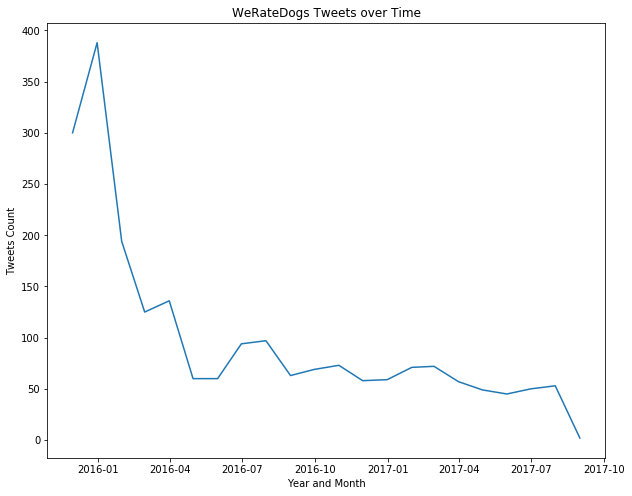

In [84]:
# plot time vs tweet

plt.figure(figsize=(10,8))

# plt.xlim([datetime.date(2015,11,30), datetime(2017,7,30)])

plt.xlabel('Year and Month')

plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)

plt.title('WeRateDogs Tweets over Time');

> over the time the graph decreases rapidly. its no peak on 2016-01 and then decreasaes rapidly to 2017-10

###  Analyze and Visualize: Visualizing the retweet counts, and favorite counts comparison over time.

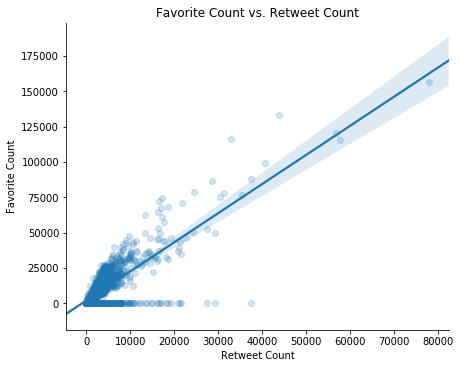

In [88]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x= 'retweet_count', y = 'favorite_count', data= tweet_datas, size = 5, 
           aspect = 1.3, scatter_kws = {'alpha':1/5})

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

> favourite count are co related with retweet count. This is a positive co relation.

###  Analyze and Visualize: Visualizing the most popular dog breed

In [89]:
tweet_datas.dog_type.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

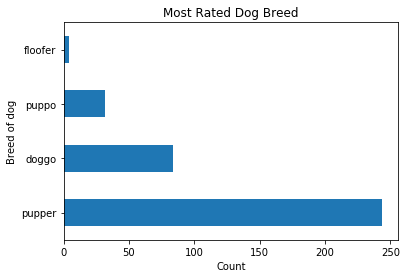

In [96]:
# dog_breed = tweet_datas.groupby('dog_breed').filter(lambda x: len(x)>=25)

tweet_datas.dog_type.value_counts().plot(kind = 'barh')

plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');


> pupper is the most popular dog breed.

###  Analyze and Visualize: Visualizing the most popular dog names¶

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


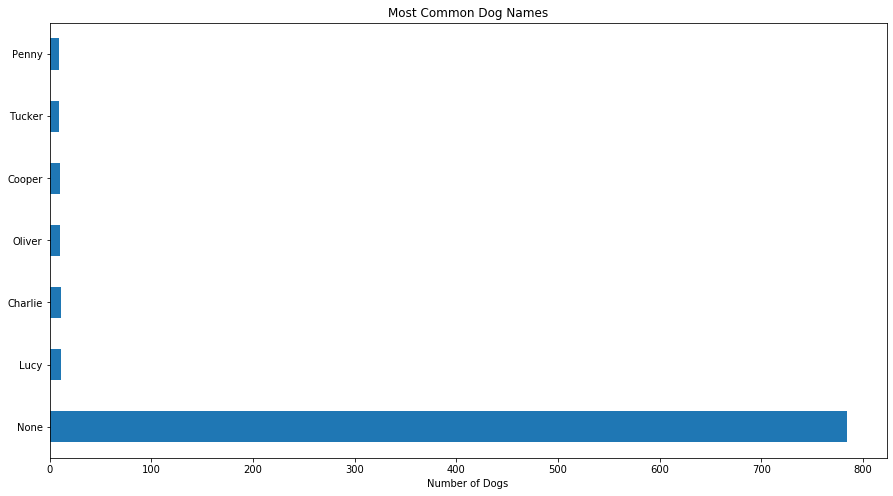

In [97]:

tweet_datas.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");